<a href="https://colab.research.google.com/github/RaveEx12/InternCareer/blob/main/Breast_Cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Normalization, Dense, InputLayer, Dropout
from tensorflow.keras.losses import sparse_categorical_crossentropy, BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import FalsePositives, FalseNegatives, TruePositives, TrueNegatives, BinaryAccuracy, AUC, Precision, Recall
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler


sns.set(style="whitegrid")

#**DATA MANAGEMENT**

In [2]:
CONFIGURATION = {
    'N_ROWS' : 8,
    'N_COLS' : 4,
    'TRAIN_RATIO' : 0.8,
    'VAL_RATIO' : 0.1,
    'TEST_RATIO' : 0.1,
    'N_PATIENCE' : 2
}

In [3]:
dataset_directory = "/content/BreastCancer.csv"

In [4]:
dataset = pd.read_csv(dataset_directory)
dataset.head(n=10)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,NaN


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [6]:
dataset = dataset.drop(['Unnamed: 32'], axis = 1)

In [7]:
dataset.isnull().sum()

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [8]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


#**Data Visualization**

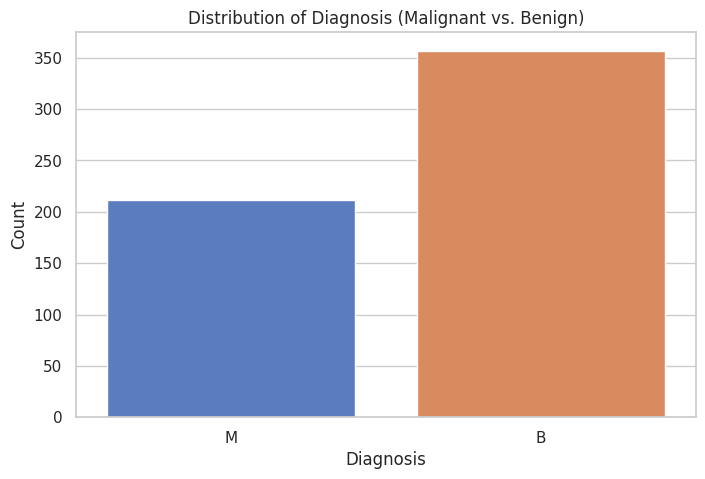

In [9]:
plt.figure(figsize=(8, 5))
sns.countplot(x='diagnosis', data=dataset, palette='muted')
plt.title('Distribution of Diagnosis (Malignant vs. Benign)')
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.show()

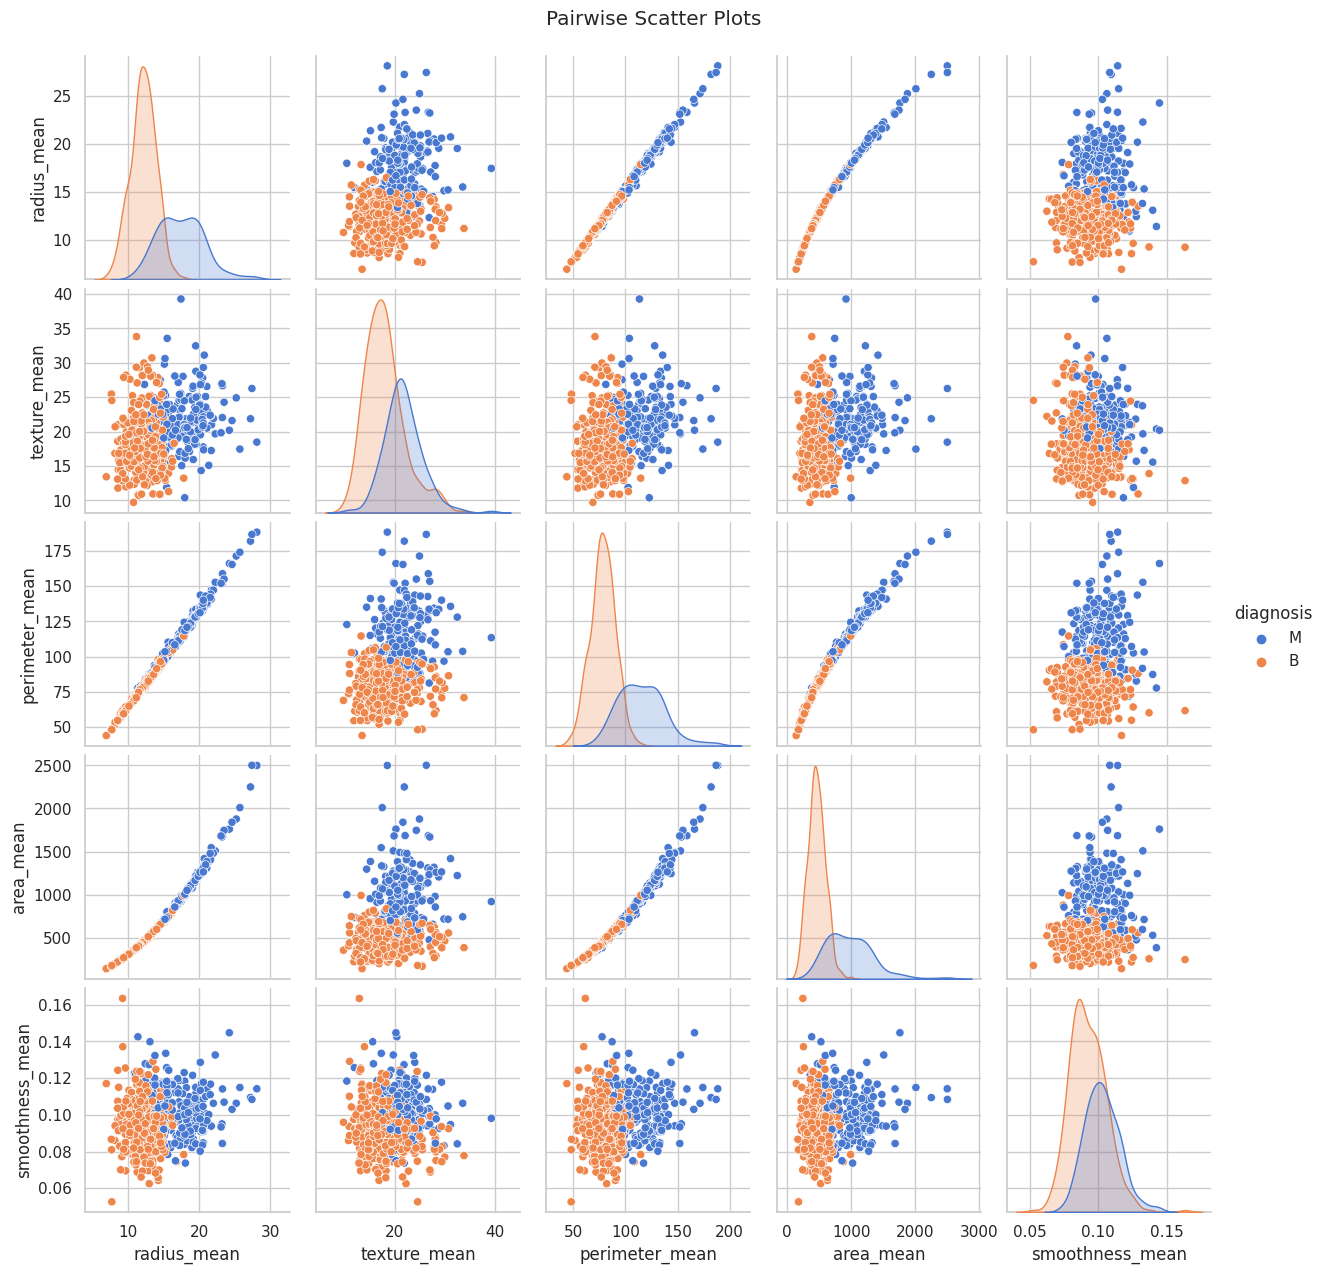

In [10]:
sns.pairplot(dataset, hue='diagnosis', vars=['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean'], palette='muted')
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

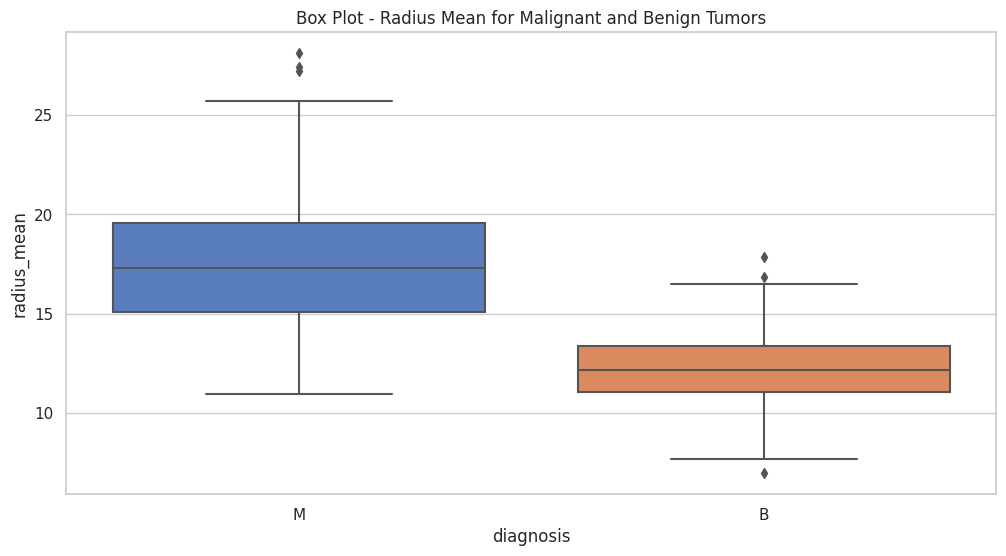

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='diagnosis', y='radius_mean', data=dataset, palette='muted')
plt.title('Box Plot - Radius Mean for Malignant and Benign Tumors')
plt.show()

<ipython-input-12-4714c98d8188>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')


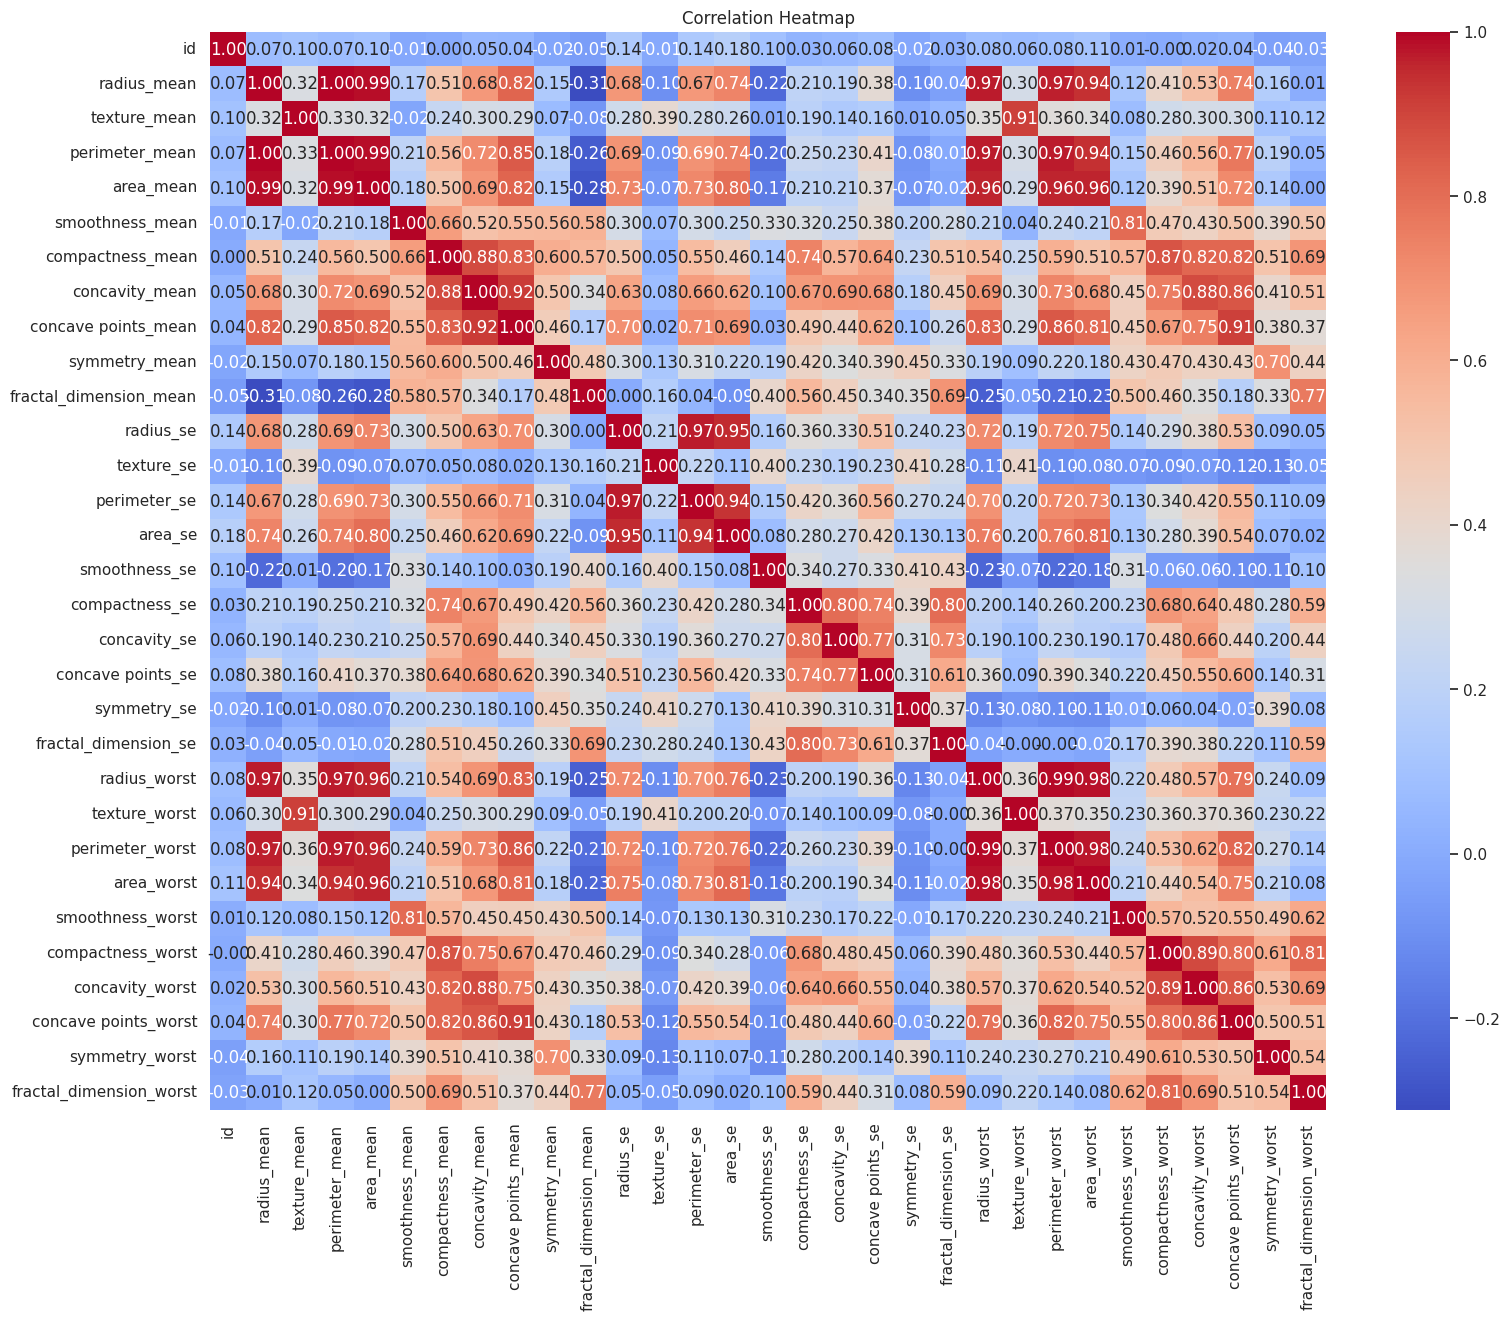

In [12]:
plt.figure(figsize=(18, 14))
sns.heatmap(dataset.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

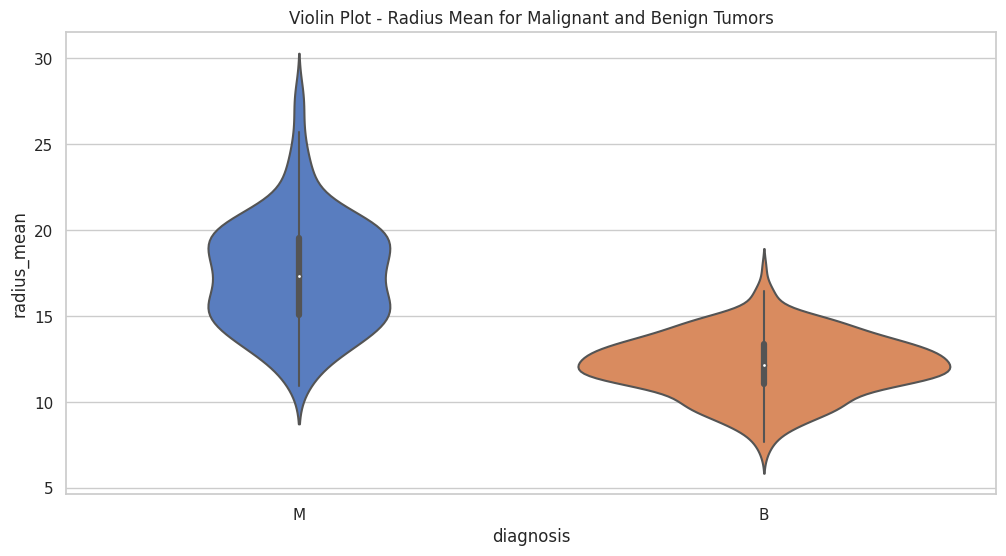

In [13]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='diagnosis', y='radius_mean', data=dataset, palette='muted')
plt.title('Violin Plot - Radius Mean for Malignant and Benign Tumors')
plt.show()

<ipython-input-14-4855744cdbde>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(8, 4, i)


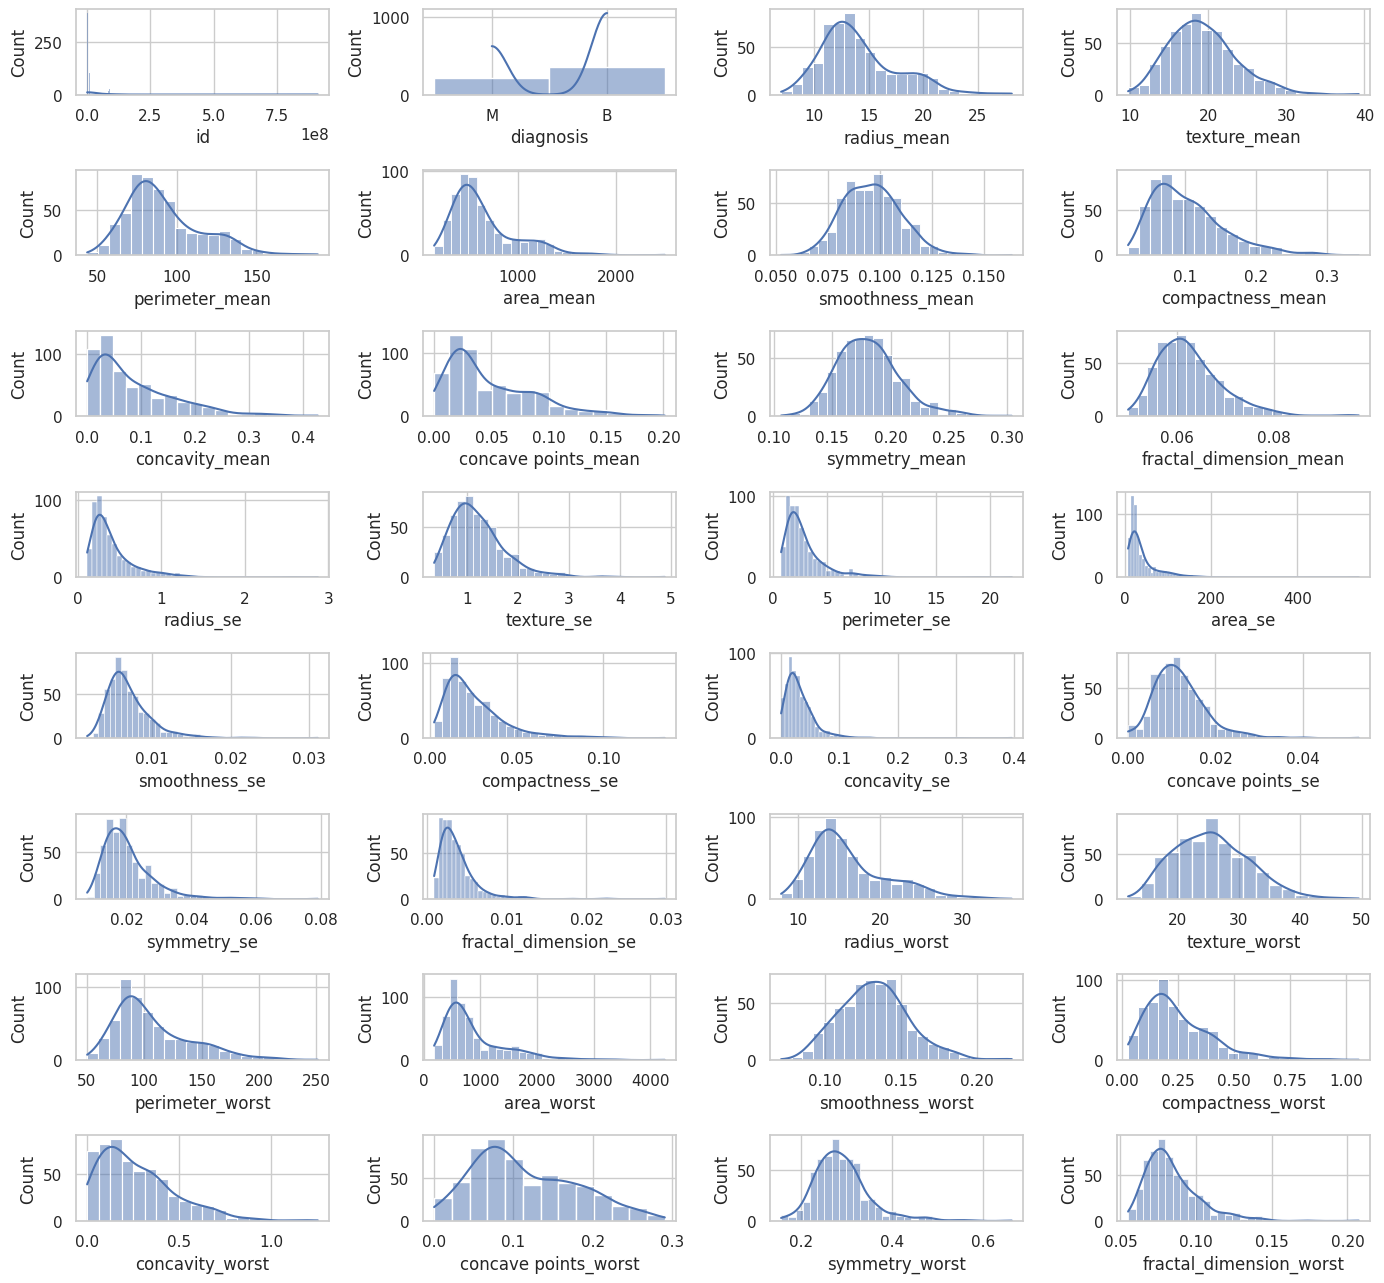

In [14]:
plt.figure(figsize=(14, 13))
plt.title("Distribution of feature Data in the Dataset")
for i,col in enumerate(dataset.columns,1):
    plt.subplot(8, 4, i)
    plt.title('')
    sns.histplot(dataset[col],kde=True)
    plt.tight_layout()
    plt.plot()
plt.show()

In [15]:
dataset.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

#**Data Preprocessing**

##**Dealing with Outliers**

In [16]:
q = dataset['radius_se'].quantile(97.5/100)
x_1 = dataset[dataset['radius_se'] < q]

<Axes: xlabel='radius_se', ylabel='Density'>

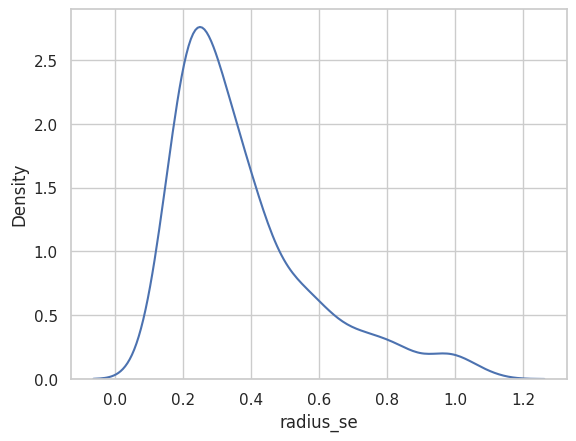

In [17]:
sns.kdeplot(x_1['radius_se'])

In [18]:
q = x_1['texture_se'].quantile(99/100)
x_2 = x_1[x_1['texture_se'] < q]

<Axes: xlabel='texture_se', ylabel='Density'>

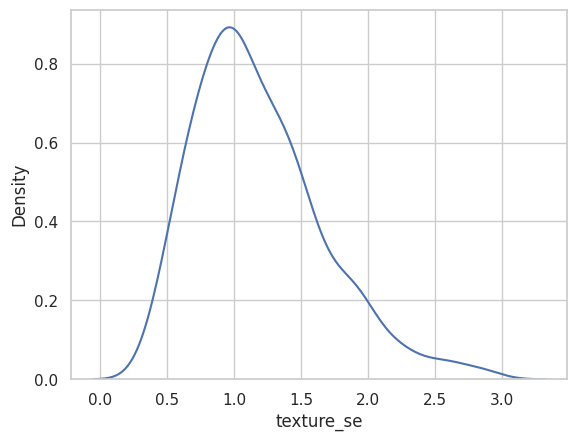

In [19]:
sns.kdeplot(x_2['texture_se'])

In [20]:
q = x_2['perimeter_se'].quantile(99/100)
x_3 = x_2[x_2['perimeter_se'] < q]

<Axes: xlabel='perimeter_se', ylabel='Density'>

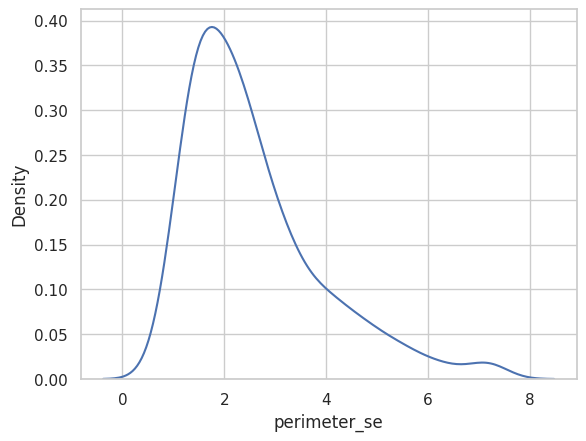

In [21]:
sns.kdeplot(x_3['perimeter_se'])

In [22]:
q = x_3['area_se'].quantile(99/100)
x_4 = x_3[x_3['area_se'] < q]

<Axes: xlabel='area_se', ylabel='Density'>

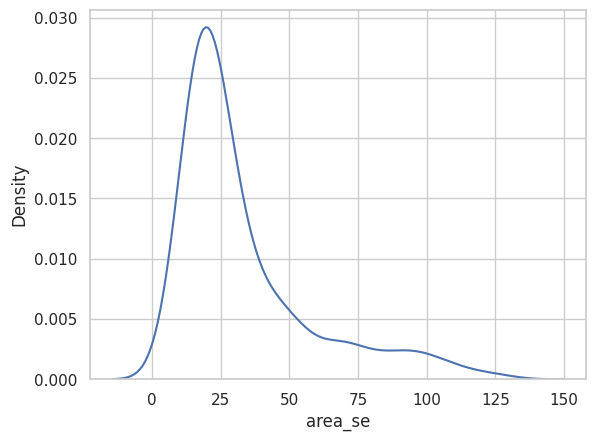

In [23]:
sns.kdeplot(x_4['area_se'])

In [24]:
q = x_4['smoothness_se'].quantile(99.5/100)
x_5 = x_4[x_4['smoothness_se'] < q]

<Axes: xlabel='smoothness_se', ylabel='Density'>

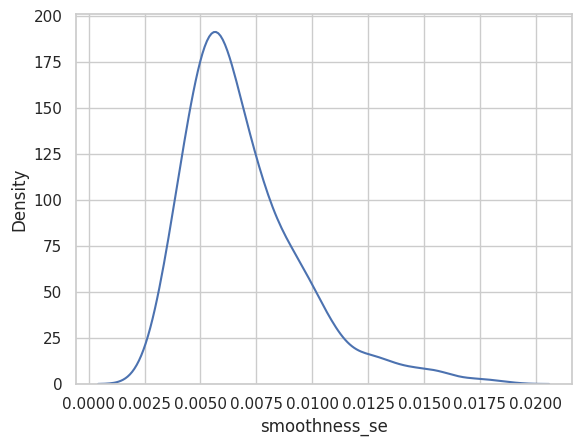

In [25]:
sns.kdeplot(x_5['smoothness_se'])

In [26]:
q = x_5['compactness_se'].quantile(99.5/100)
x_6 = x_5[x_5['compactness_se'] < q]

<Axes: xlabel='compactness_se', ylabel='Density'>

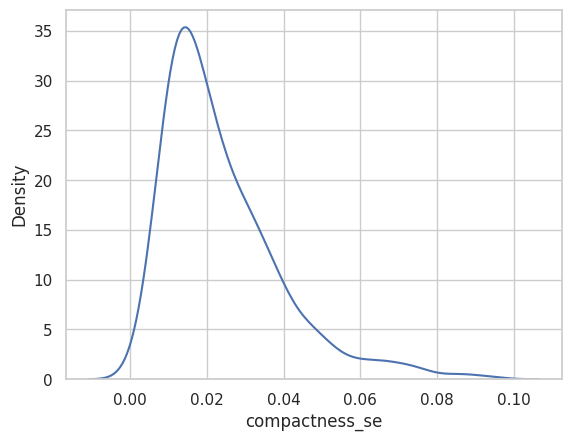

In [27]:
sns.kdeplot(x_6['compactness_se'])

In [28]:
q = x_6['concavity_se'].quantile(99/100)
x_7 = x_6[x_6['concavity_se'] < q]

<Axes: xlabel='concavity_se', ylabel='Density'>

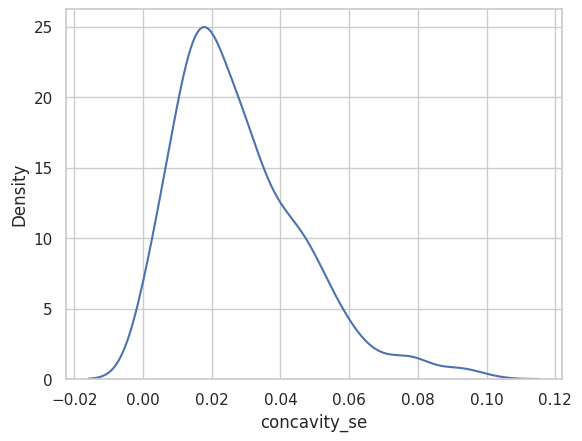

In [29]:
sns.kdeplot(x_7['concavity_se'])

In [30]:
q = x_7['symmetry_se'].quantile(98/100)
x_8 = x_7[x_7['symmetry_se'] < q]

<Axes: xlabel='symmetry_se', ylabel='Density'>

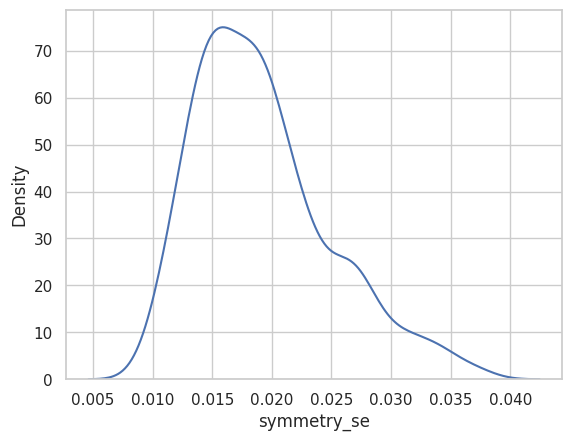

In [31]:
sns.kdeplot(x_8['symmetry_se'])

In [32]:
q = x_8['fractal_dimension_se'].quantile(98.5/100)
x_9 = x_8[x_8['fractal_dimension_se'] < q]

<Axes: xlabel='fractal_dimension_se', ylabel='Density'>

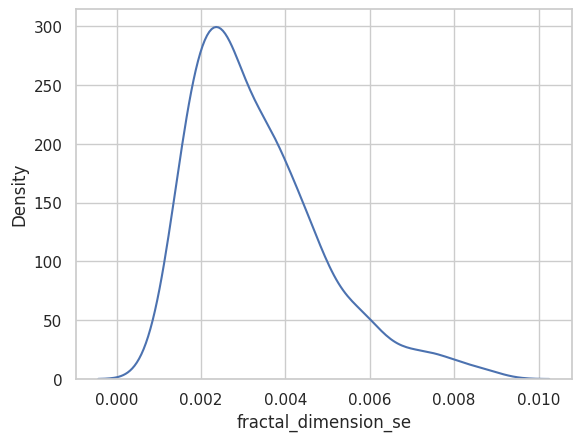

In [33]:
sns.kdeplot(x_9['fractal_dimension_se'])

In [34]:
q = x_9['area_worst'].quantile(98.5/100)
x_10 = x_9[x_9['area_worst'] < q]

<Axes: xlabel='area_worst', ylabel='Density'>

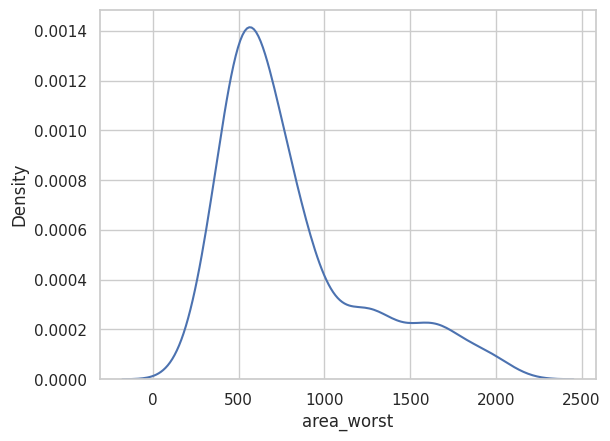

In [35]:
sns.kdeplot(x_10['area_worst'])

In [36]:
q = x_10['compactness_worst'].quantile(99/100)
x_11 = x_10[x_10['compactness_worst'] < q]

<Axes: xlabel='compactness_worst', ylabel='Density'>

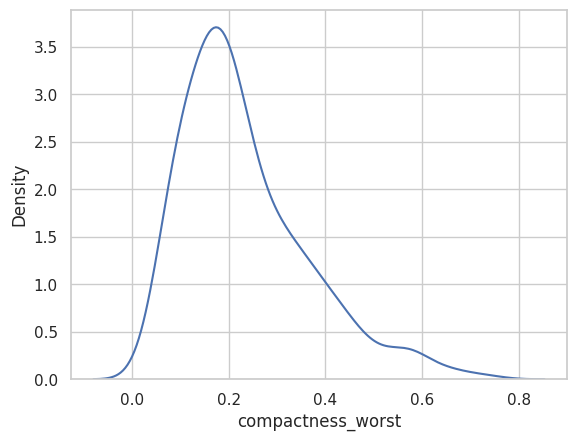

In [37]:
sns.kdeplot(x_11['compactness_worst'])

In [38]:
q = x_11['concavity_worst'].quantile(99/100)
x_12 = x_11[x_11['concavity_worst'] < q]

<Axes: xlabel='concavity_worst', ylabel='Density'>

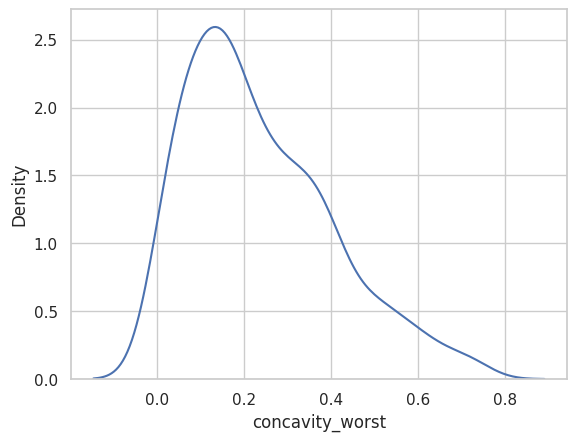

In [39]:
sns.kdeplot(x_12['concavity_worst'])

In [40]:
q = x_12['symmetry_worst'].quantile(99/100)
x_13 = x_12[x_12['symmetry_worst'] < q]

<Axes: xlabel='symmetry_worst', ylabel='Density'>

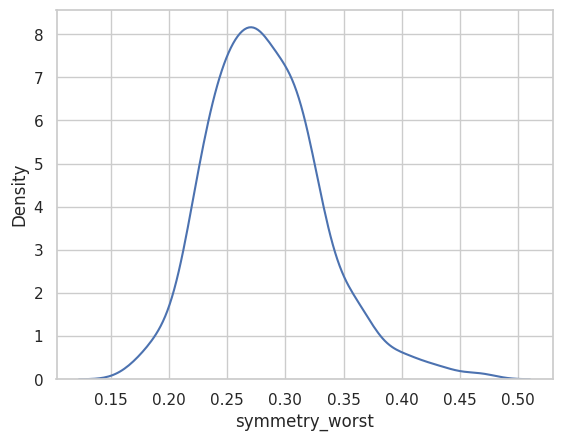

In [41]:
sns.kdeplot(x_13['symmetry_worst'])

In [42]:
q = x_13['fractal_dimension_worst'].quantile(99/100)
x_14 = x_13[x_13['fractal_dimension_worst'] < q]

<Axes: xlabel='fractal_dimension_worst', ylabel='Density'>

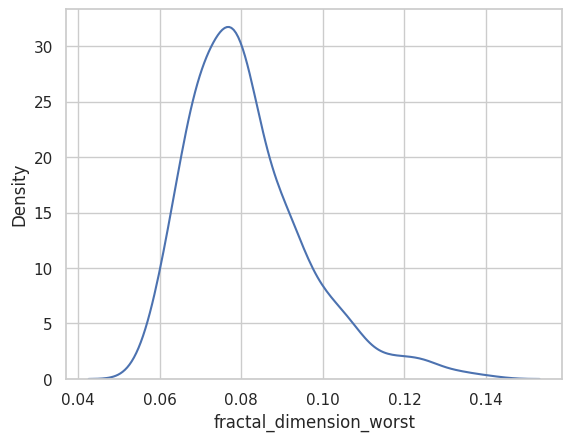

In [43]:
sns.kdeplot(x_13['fractal_dimension_worst'])

In [44]:
data_cleaned = x_14.reset_index(drop=True)
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 477 entries, 0 to 476
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       477 non-null    int64  
 1   diagnosis                477 non-null    object 
 2   radius_mean              477 non-null    float64
 3   texture_mean             477 non-null    float64
 4   perimeter_mean           477 non-null    float64
 5   area_mean                477 non-null    float64
 6   smoothness_mean          477 non-null    float64
 7   compactness_mean         477 non-null    float64
 8   concavity_mean           477 non-null    float64
 9   concave points_mean      477 non-null    float64
 10  symmetry_mean            477 non-null    float64
 11  fractal_dimension_mean   477 non-null    float64
 12  radius_se                477 non-null    float64
 13  texture_se               477 non-null    float64
 14  perimeter_se             4

<ipython-input-45-5725c0def443>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f')


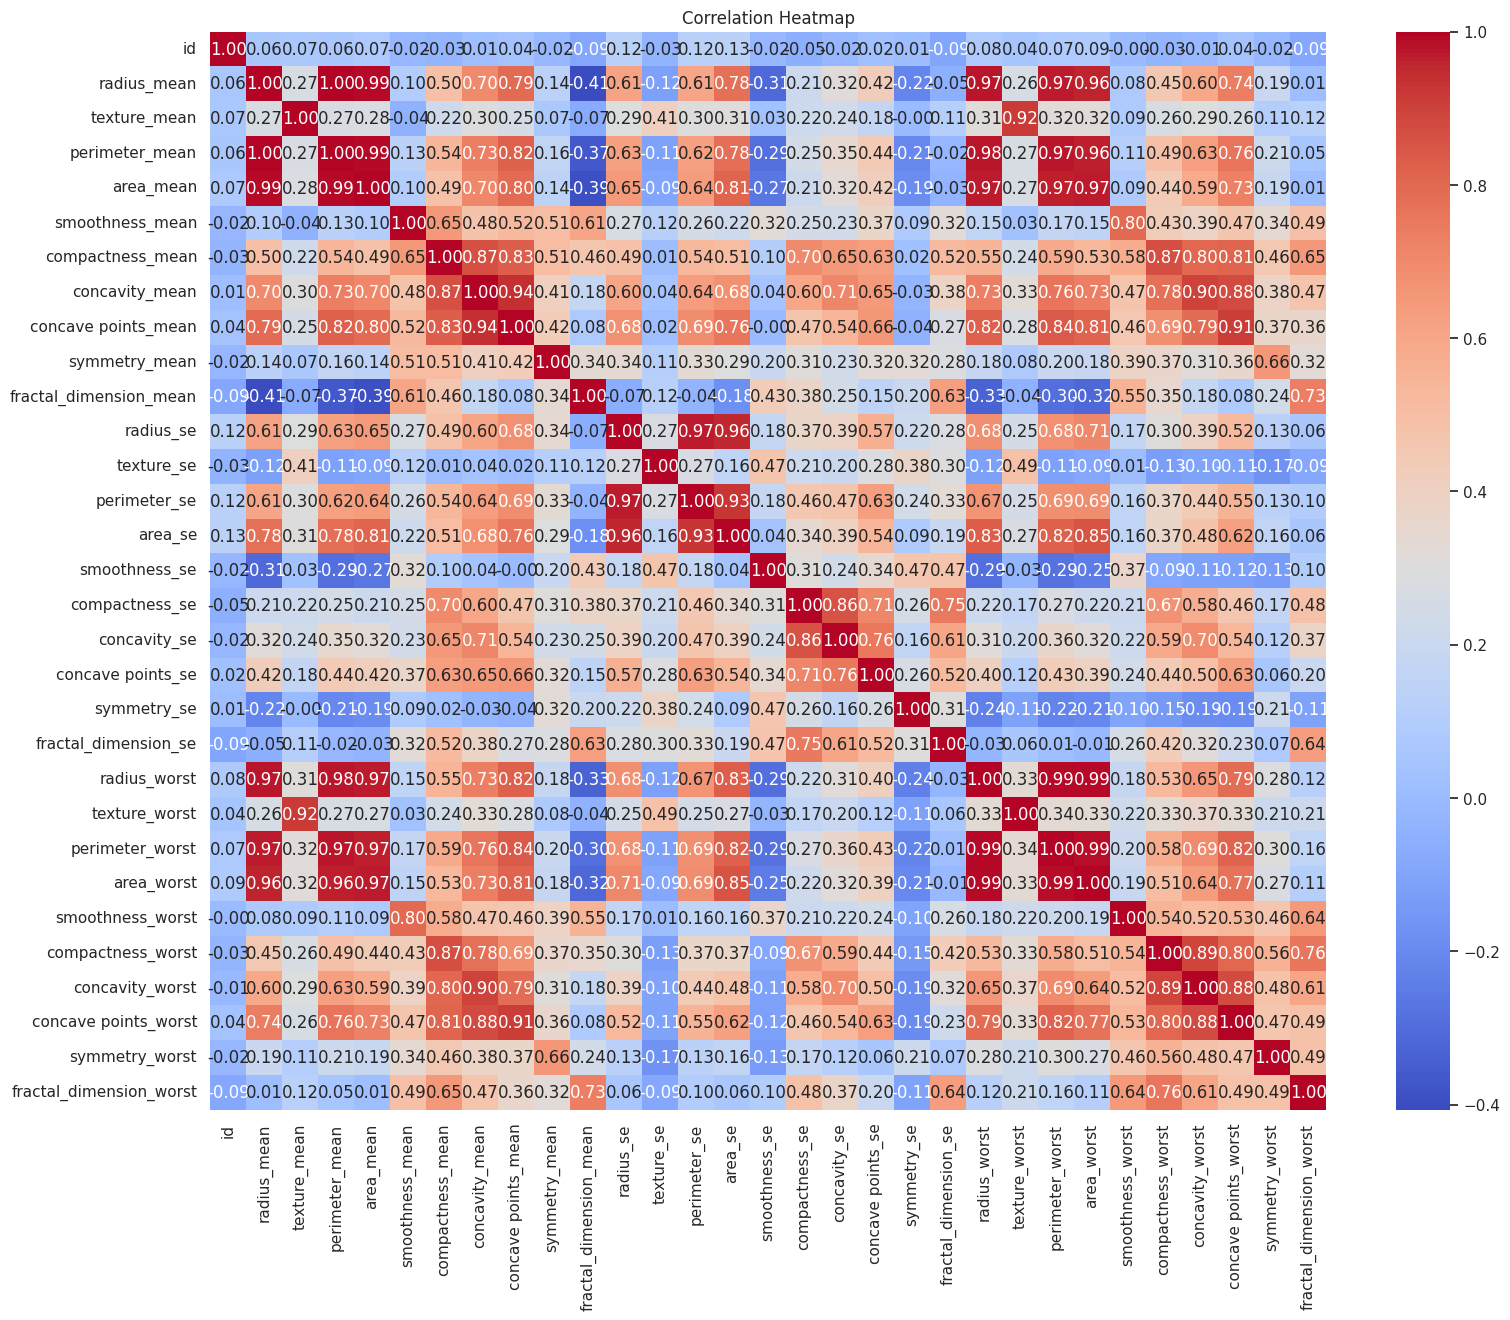

In [45]:
plt.figure(figsize=(18, 14))
sns.heatmap(data_cleaned.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

##**Data Splitting**

In [46]:
data_cleaned['diagnosis'] = data_cleaned['diagnosis'].map({'M': 1, 'B': 0})

In [47]:
X = data_cleaned.drop(['diagnosis', 'id'], axis=1)

y = data_cleaned['diagnosis']

In [48]:
y = tf.expand_dims(y, axis=-1)

In [49]:
y.shape

TensorShape([477, 1])

In [50]:
print(X.shape)
print(y.shape)

(477, 30)
(477, 1)


#**Fixing Label Imbalance**

In [51]:
#Checking for Label Imbalance
class_percentage = data_cleaned['diagnosis'].value_counts(normalize=True) * 100

print(class_percentage)

0    69.18239
1    30.81761
Name: diagnosis, dtype: float64


In [52]:
ROS = RandomOverSampler()
X_ros, y_ros = ROS.fit_resample(X, y)

print(X_ros.shape)
print(y_ros.shape)

(660, 30)
(660,)


In [53]:
y_ros = tf.expand_dims(y_ros, axis=-1)
y_ros.shape

TensorShape([660, 1])

#**Feature Extraction/Selcetion**

In [54]:
pca = PCA(n_components='mle', random_state=42)
X_pca = pca.fit_transform(X_ros)

# df_pca = pd.DataFrame(data={'Principal Component 1': X_pca[:, 0], 'Principal Component 2': X_pca[:, 1], 'Diagnosis': y_ros})

# plt.figure(figsize=(10, 8))
# sns.scatterplot(x='Principal Component 1', y='Principal Component 2', hue='Diagnosis', data=df_pca, palette='muted')
# plt.title('PCA Plot of Breast Cancer Dataset')
# plt.show()

In [55]:
X_pca.shape

(660, 29)

#**Feature Scaling**

In [56]:
DATASET_SIZE = len(X_pca)

In [57]:
X_train = X_pca[:int(DATASET_SIZE*CONFIGURATION['TRAIN_RATIO'])]
y_train = y_ros[:int(DATASET_SIZE*CONFIGURATION['TRAIN_RATIO'])]

print(X_train.shape)
print(y_train.shape)

(528, 29)
(528, 1)


In [58]:
normalizer = Normalization()
normalizer.adapt(X_train)
normalizer(X_train)[:5]

<tf.Tensor: shape=(5, 29), dtype=float32, numpy=
array([[ 2.559365  , -0.53946155, -1.2388201 , -2.2752228 ,  2.9546254 ,
        -0.6283053 , -0.06549312,  1.0048231 ,  0.07351808, -0.3163631 ,
        -0.7966974 ,  0.3239335 ,  1.0775878 , -0.02087304,  1.4992006 ,
        -0.8994047 ,  0.35228676, -0.86468804,  1.6517386 ,  0.7160859 ,
         0.11892667,  3.3328242 , -0.7713072 , -0.6665459 ,  0.19482449,
         0.53578746,  0.6064903 , -0.40067032, -0.01829439],
       [ 2.0297735 , -0.01356715,  1.3043525 , -0.61303186,  1.0087641 ,
        -1.8621598 , -0.13738811, -0.95007485, -1.7540997 , -0.5510853 ,
         1.5304972 ,  0.13699743,  2.2213683 ,  0.10755248,  1.6915773 ,
        -0.94763213,  1.5957927 , -0.9819352 , -1.2443464 , -0.97132075,
         0.35971296, -0.64202964,  0.9063029 , -0.9235136 ,  0.7367826 ,
        -1.5353214 ,  0.3752983 ,  0.748244  ,  0.1752206 ],
       [ 1.9118301 ,  2.6869073 ,  2.3067575 , -1.2042004 , -0.42406523,
         1.4356749 , -0.23

In [59]:
X_val = X_pca[int(DATASET_SIZE*CONFIGURATION['TRAIN_RATIO']):int(DATASET_SIZE*(CONFIGURATION['TRAIN_RATIO']+CONFIGURATION['VAL_RATIO']))]
y_val = y_ros[int(DATASET_SIZE*CONFIGURATION['TRAIN_RATIO']):int(DATASET_SIZE*(CONFIGURATION['TRAIN_RATIO']+CONFIGURATION['VAL_RATIO']))]

print(X_val.shape)
print(y_val.shape)

(66, 29)
(66, 1)


In [60]:
X_test = X_pca[int(DATASET_SIZE*(CONFIGURATION['TRAIN_RATIO']+CONFIGURATION['TEST_RATIO'])):]
y_test = y_ros[int(DATASET_SIZE*(CONFIGURATION['TRAIN_RATIO']+CONFIGURATION['TEST_RATIO'])):]

print(X_test.shape)
print(y_test.shape)

(66, 29)
(66, 1)


#**Model**

In [95]:
INPUT = 29

nn_model = tf.keras.Sequential([
    InputLayer(input_shape = (INPUT,)),
    normalizer,
    Dense(128, activation = 'relu', ),
    Dropout(0.2),
    Dense(64, activation = 'relu'),
    Dropout(0.2),
    Dense(32, activation = 'relu'),
    Dense(32, activation = 'softmax'),
    Dense(1)
])

In [96]:
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizati  (None, 29)                59        
 on)                                                             
                                                                 
 dense_9 (Dense)             (None, 128)               3840      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                      

##**Callbacks**

###**Early Stopping**

In [76]:
es_callback = EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience = CONFIGURATION['N_PATIENCE'],
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0
)

###**Learning Rate Schedular**

In [64]:
def scheduler(epoch, lr):
  if epoch < 10:
    return lr
  else:
    return lr * tf.math.exp(-0.1)
LR_sheduler_callback = LearningRateScheduler(scheduler, verbose= 1)

##**Metrics**

In [65]:
metrics = [BinaryAccuracy(name='accuracy'), TruePositives(name='tp'), TrueNegatives(name='tn'), FalsePositives(name='fp'), FalseNegatives(name='fn'),
           AUC(name='auc'), Precision(name='precision'), Recall(name='recall')]

##**Training**

In [97]:
nn_model.compile(loss = BinaryCrossentropy(),
              optimizer = Adam(learning_rate = .001),
              metrics = metrics
)

In [98]:
history = nn_model.fit(X_pca,
                    y_ros,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    verbose=1,
                    callbacks =[es_callback, LR_sheduler_callback]
                    )


Epoch 1: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 1/50
21/21 [==============================] - 4s 53ms/step - loss: 1.2555 - accuracy: 0.5441 - tp: 65.0000 - tn: 330.0000 - fp: 0.0000e+00 - fn: 331.0000 - auc: 0.6628 - precision: 1.0000 - recall: 0.1641 - val_loss: 1.7494 - val_accuracy: 0.0000e+00 - val_tp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fp: 0.0000e+00 - val_fn: 66.0000 - val_auc: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - lr: 0.0010

Epoch 2: LearningRateScheduler setting learning rate to 0.0010000000474974513.
Epoch 2/50
21/21 [==============================] - 0s 10ms/step - loss: 0.8747 - accuracy: 0.5000 - tp: 0.0000e+00 - tn: 330.0000 - fp: 0.0000e+00 - fn: 330.0000 - auc: 0.6559 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 1.3257 - val_accuracy: 0.0000e+00 - val_tp: 0.0000e+00 - val_tn: 0.0000e+00 - val_fp: 0.0000e+00 - val_fn: 66.0000 - val_auc: 0.0000e+00 - val_precision: 0.0000e+00 - val_recall: 0

##**Model Evaluation**

In [99]:
nn_model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 9ms/step - loss: 0.0702 - accuracy: 1.0000 - tp: 66.0000 - tn: 0.0000e+00 - fp: 0.0000e+00 - fn: 0.0000e+00 - auc: 0.0000e+00 - precision: 1.0000 - recall: 1.0000


[0.07017725706100464, 1.0, 66.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]

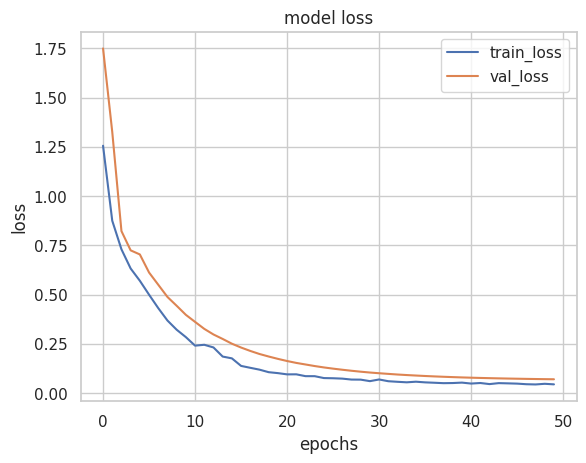

In [100]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("model loss")
plt.ylabel('loss')
plt.xlabel('epochs')
plt.legend(['train_loss', 'val_loss'])
plt.show()

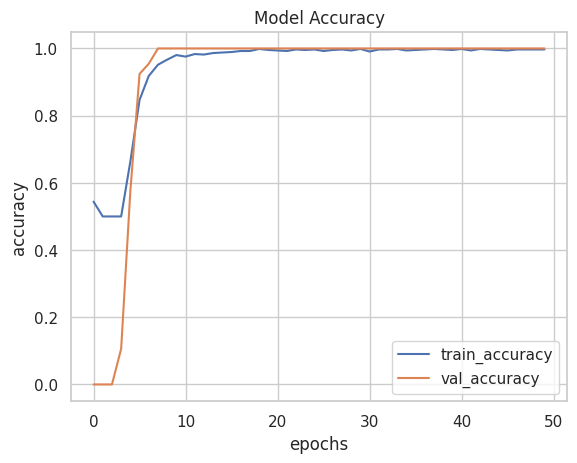

In [101]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy")
plt.ylabel('accuracy')
plt.xlabel('epochs')
plt.legend(['train_accuracy', 'val_accuracy'])
plt.show()

In [102]:
nn_model.predict(tf.expand_dims(X_test[0], axis = 0))

1/1 [==============================] - 0s 79ms/step


array([[0.9328426]], dtype=float32)

2/2 [==============================] - 0s 5ms/step


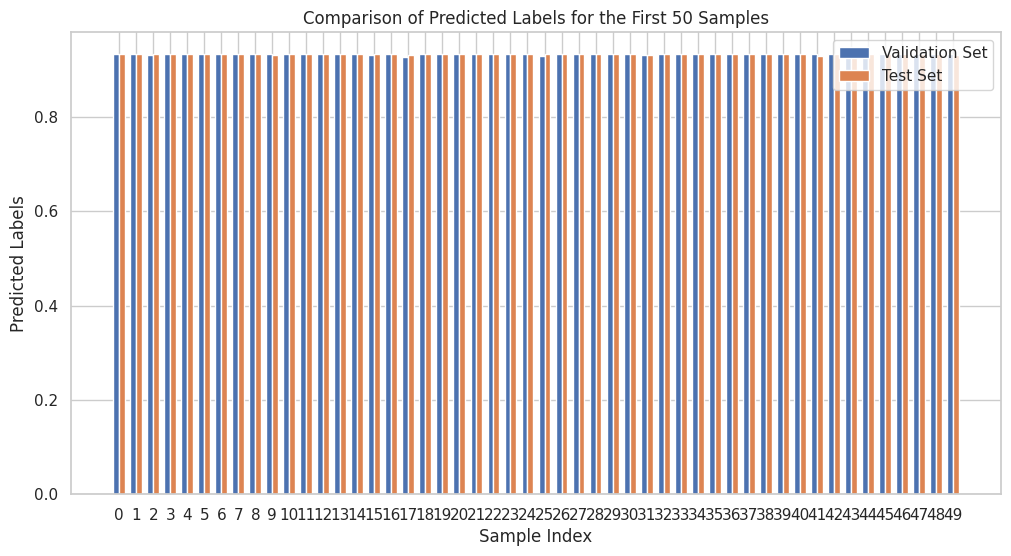

In [103]:
y_val_pred = nn_model.predict(X_val[:50])
y_test_pred = nn_model.predict(X_test[:50])

indices = np.arange(50)

plt.figure(figsize=(12, 6))
bar_width = 0.35

plt.bar(indices, y_val_pred[:50].flatten(), bar_width, label='Validation Set')
plt.bar(indices + bar_width, y_test_pred[:50].flatten(), bar_width, label='Test Set')

plt.xlabel('Sample Index')
plt.ylabel('Predicted Labels')
plt.title('Comparison of Predicted Labels for the First 50 Samples')
plt.xticks(indices + bar_width / 2, indices)
plt.legend()

plt.show()